# Over Sampling


we will apply the augmentations to the following folders

3-4: 9

4-1: 3

4-2: 2

2-3: 2

3-1: 4

3-2: 3

2-2: 5

1-2: 2

2-1: 12

In [37]:
import os
from PIL import Image
import numpy as np
import albumentations as A

# Define the augmentation pipeline
augmentations = A.Compose([
    A.HorizontalFlip(p=0.5),
    A.ShiftScaleRotate(shift_limit=0.0625, scale_limit=0.2, rotate_limit=45, p=0.5)
])

def augment_image(image_path, output_dir, num_augmentations=4):
    # Open the image
    image = Image.open(image_path).convert("RGB")
    image_np = np.array(image)
    
    for i in range(num_augmentations):
        # Apply augmentations
        augmented = augmentations(image=image_np)
        image_aug = augmented["image"]
        image_aug_pil = Image.fromarray(image_aug)
        
        # Save the augmented image
        base_name = os.path.splitext(os.path.basename(image_path))[0]
        aug_name = f"{base_name}_aug_{i}.jpg"
        aug_path = os.path.join(output_dir, aug_name)
        image_aug_pil.save(aug_path)
        
def iterate_and_augment(input_dir, output_dir, num_augmentations=4):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
        
    for root, _, files in os.walk(input_dir):
        for file in files:
            if file.lower().endswith(('png', 'jpg', 'jpeg')):
                image_path = os.path.join(root, file)
                augment_image(image_path, output_dir, num_augmentations)
                



In [38]:
# Example usage
input_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/updated_categories/3-4 Cylindrical Segment"
output_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/new_updated_categories/3-4 Cylindrical Segment"
num_augmentations_per_image = 9
iterate_and_augment(input_directory, output_directory, num_augmentations_per_image)

In [39]:
# Example usage
input_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/updated_categories/4-1_Prism  Form"
output_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/new_updated_categories/4-1_Prism  Form"
num_augmentations_per_image = 3
iterate_and_augment(input_directory, output_directory, num_augmentations_per_image)

In [40]:
# Example usage
input_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/updated_categories/4-2_Distorted Prism  Form"
output_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/new_updated_categories/4-2_Distorted Prism  Form"
num_augmentations_per_image = 2
iterate_and_augment(input_directory, output_directory, num_augmentations_per_image)

In [41]:
# Example usage
input_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/updated_categories/2-3_Conjoined Cube Form"
output_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/new_updated_categories/2-3_Conjoined Cube Form"
num_augmentations_per_image = 2
iterate_and_augment(input_directory, output_directory, num_augmentations_per_image)

In [42]:
# Example usage
input_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/updated_categories/3-1_Cylindrical Form"
output_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/new_updated_categories/3-1_Cylindrical Form"
num_augmentations_per_image = 4
iterate_and_augment(input_directory, output_directory, num_augmentations_per_image)

In [43]:
# Example usage
input_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/updated_categories/3-2_Distorted Cylindrical Form"
output_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/new_updated_categories/3-2_Distorted Cylindrical Form"
num_augmentations_per_image = 3
iterate_and_augment(input_directory, output_directory, num_augmentations_per_image)

In [44]:
# Example usage
input_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/updated_categories/2-2_Distorted Cube"
output_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/new_updated_categories/2-2_Distorted Cube"
num_augmentations_per_image = 5
iterate_and_augment(input_directory, output_directory, num_augmentations_per_image)

In [45]:
# Example usage
input_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/updated_categories/1-2_Distorted 3D Rectangles"
output_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/new_updated_categories/1-2_Distorted 3D Rectangles"
num_augmentations_per_image = 2
iterate_and_augment(input_directory, output_directory, num_augmentations_per_image)

In [46]:
# Example usage
input_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/updated_categories/2-1_Cube"
output_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/new_updated_categories/2-1_Cube"
num_augmentations_per_image = 11
iterate_and_augment(input_directory, output_directory, num_augmentations_per_image)

# Under Sampling

1-3

3-3

4-3

In [47]:
import os
import random
import shutil

def select_random_images(input_dir, output_dir, num_images=250):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # List all image files in the input directory
    image_files = [f for f in os.listdir(input_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))]
    
    # Ensure there are enough images to select from
    if len(image_files) < num_images:
        raise ValueError(f"Input directory must contain at least {num_images} images.")
    
    # Select a random subset of images
    selected_images = random.sample(image_files, num_images)
    
    # Copy the selected images to the output directory
    for image_file in selected_images:
        src_path = os.path.join(input_dir, image_file)
        dst_path = os.path.join(output_dir, image_file)
        shutil.copy(src_path, dst_path)


In [48]:
# Example usage
input_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/updated_categories/4-3_Conjoined Prism Form"
output_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/new_updated_categories/4-3_Conjoined Prism Form"
num_images_to_select = 500

select_random_images(input_directory, output_directory, num_images_to_select)

In [49]:
# Example usage
input_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/updated_categories/3-3_Conjoined Cylindrical Form"
output_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/new_updated_categories/3-3_Conjoined Cylindrical Form"
num_images_to_select = 500

select_random_images(input_directory, output_directory, num_images_to_select)

In [50]:
# Example usage
input_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/updated_categories/1-3_Conjoined 3D Rectangles"
output_directory = "C:/Users/20127/Desktop/sketch_retrieval/dataset_mine/dataset_mine/new_updated_categories/1-3_Conjoined 3D Rectangles"
num_images_to_select = 500

select_random_images(input_directory, output_directory, num_images_to_select)

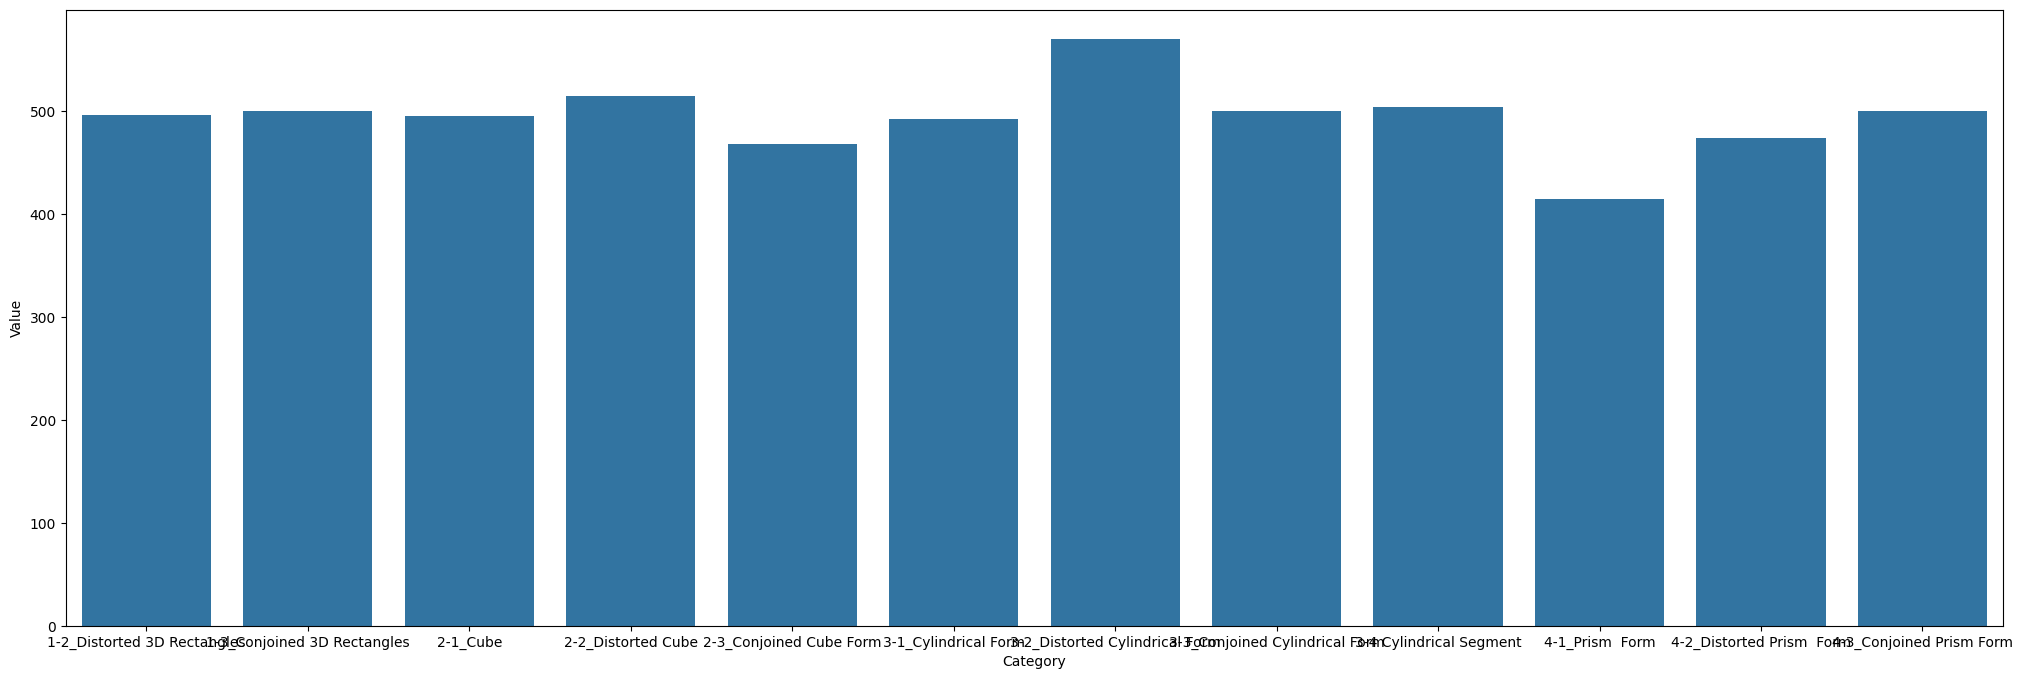

In [51]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt


plt.figure(figsize=(25, 8))
# Convert dictionary to DataFrame
df = pd.DataFrame(list(data_dict.items()), columns=['Category', 'Value'])

# Create the bar plot
sns.barplot(x='Category', y='Value', data=df)

# Add labels and title
# plt.xlabel('Category')
# plt.ylabel('Value')
# plt.title('Bar Graph from Dictionary')

# Show the plot
plt.show()